It’s 01/01/24 and you are asked for help in choosing a hedge for a long position in AAPL. You can choose your short between MSFT and META, and your goal is to have zero profit in the following month. Make a recommendation and evaluate it

approach:

1. Download historical data for AAPL, MSFT & META up to 12/31/23.
2. Simulate stock prices for those assets from 1/1/24 to 2/1/24. Use historical data to calibrate the model. Measure correlation between assets.
3. Evaluate which one is more convenient in order to have zero profit at that date.


# download historical data

In [38]:
# imports
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import yfinance as yf

# download historical data 

start = '2021-12-31' # see APPENDIX ONE to see why this time window was chosen
end = '2023-12-31'

AAPL = yf.download('AAPL', start=start, end=end)

AAPL.head()


[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2021-12-31 00:00:00+00:00,174.708191,177.570007,179.229996,177.259995,178.089996,64062300
2022-01-03 00:00:00+00:00,179.076569,182.009995,182.880005,177.710007,177.830002,104487900
2022-01-04 00:00:00+00:00,176.803802,179.699997,182.940002,179.119995,182.630005,99310400
2022-01-05 00:00:00+00:00,172.100861,174.919998,180.169998,174.639999,179.610001,94537600
2022-01-06 00:00:00+00:00,169.227921,172.000000,175.300003,171.639999,172.699997,96904000


In [39]:
MSFT = yf.download('MSFT', start=start, end=end)

MSFT.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2021-12-31 00:00:00+00:00,328.474182,336.320007,339.359985,335.850006,338.510010,18000800
2022-01-03 00:00:00+00:00,326.940857,334.750000,338.000000,329.779999,335.350006,28865100
2022-01-04 00:00:00+00:00,321.334717,329.010010,335.200012,326.119995,334.829987,32674300
2022-01-05 00:00:00+00:00,308.999390,316.380005,326.070007,315.980011,325.859985,40054300
2022-01-06 00:00:00+00:00,306.557709,313.880005,318.700012,311.489990,313.149994,39646100


In [40]:
META = yf.download('META', start=start, end=end)

META.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META,META
Date,,,,,,
2021-12-31 00:00:00+00:00,335.340332,336.350006,343.440002,336.269989,343.019989,12870500
2022-01-03 00:00:00+00:00,337.523743,338.540009,341.079987,337.190002,338.299988,14537900
2022-01-04 00:00:00+00:00,335.519806,336.529999,343.089996,331.869995,339.950012,15998000
2022-01-05 00:00:00+00:00,323.196899,324.170013,335.760010,323.839996,333.019989,20564500
2022-01-06 00:00:00+00:00,331.462006,332.459991,339.170013,322.720001,322.820007,27962800


# Calibrate the model to simulate

## Correlation - daily returns

### AAPL vs MSFT

corr = 0.738


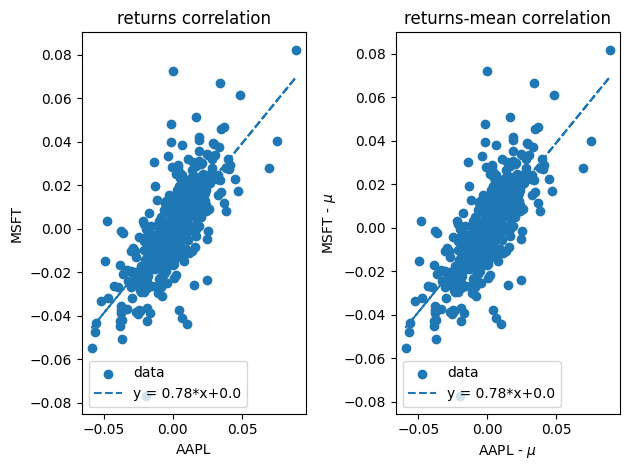

In [205]:
# returns
rAAPL = (AAPL.Close[1:].values/AAPL.Close[:-1].values).flatten()-1
rMSFT = (MSFT.Close[1:].values/MSFT.Close.values[:-1]).flatten()-1
# means
muAAPL = np.mean(rAAPL)
muMSFT = np.mean(rMSFT)
# 1d fit
coef = np.polyfit(rAAPL, rMSFT, 1)
poly1d_fn = np.poly1d(coef)
# plot
fig, ax = plt.subplots(1,2)
ax[0].scatter(rAAPL, rMSFT, label='data')
ax[0].plot(rAAPL, poly1d_fn(rAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[0].set_xlabel('AAPL')
ax[0].set_ylabel('MSFT')
ax[0].set_title('returns correlation')
ax[0].legend()

ax[1].scatter(rAAPL-muAAPL, rMSFT-muMSFT, label='data')
ax[1].plot(rAAPL-muAAPL, poly1d_fn(rAAPL-muAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[1].set_xlabel(r'AAPL - $\mu$')
ax[1].set_ylabel(r'MSFT - $\mu$')
ax[1].set_title('returns-mean correlation')
ax[1].legend()

fig.tight_layout()

print('corr = %.3f'%np.corrcoef(rAAPL, rMSFT)[0,1])

corr = 0.739


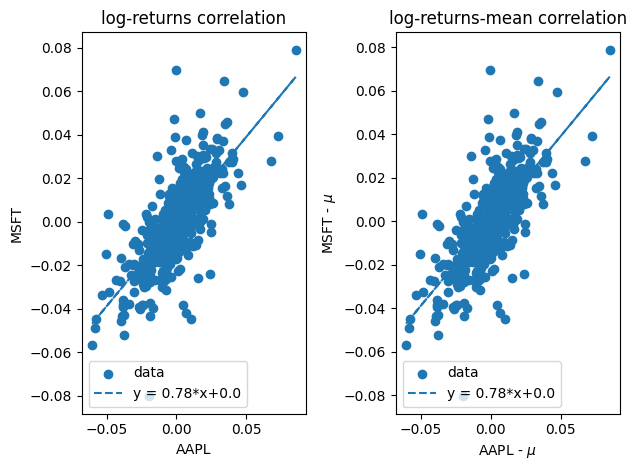

In [206]:
# log-returns
rAAPL = np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).flatten()
rMSFT = np.log(MSFT.Close[1:].values/MSFT.Close.values[:-1]).flatten()
# means
muAAPL = np.mean(rAAPL)
muMSFT = np.mean(rMSFT)
# 1d fit
coef = np.polyfit(rAAPL, rMSFT, 1)
poly1d_fn = np.poly1d(coef)
# plot
fig, ax = plt.subplots(1,2)
ax[0].scatter(rAAPL, rMSFT, label='data')
ax[0].plot(rAAPL, poly1d_fn(rAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[0].set_xlabel('AAPL')
ax[0].set_ylabel('MSFT')
ax[0].set_title('log-returns correlation')
ax[0].legend()

ax[1].scatter(rAAPL-muAAPL, rMSFT-muMSFT, label='data')
ax[1].plot(rAAPL-muAAPL, poly1d_fn(rAAPL-muAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[1].set_xlabel(r'AAPL - $\mu$')
ax[1].set_ylabel(r'MSFT - $\mu$')
ax[1].set_title('log-returns-mean correlation')
ax[1].legend()

fig.tight_layout()

print('corr = %.3f'%np.corrcoef(rAAPL, rMSFT)[0,1])

### AAPL vs META

corr = 0.575


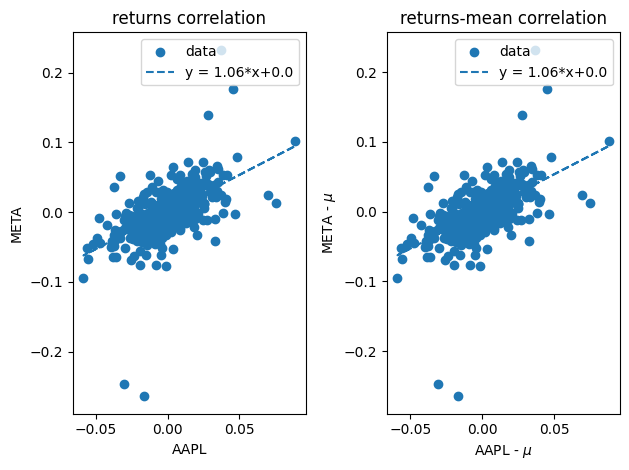

In [207]:
# returns
rAAPL = (AAPL.Close[1:].values/AAPL.Close[:-1].values).flatten()-1
rMETA = (META.Close[1:].values/META.Close.values[:-1]).flatten()-1
# means
muAAPL = np.mean(rAAPL)
muMETA = np.mean(rMETA)
# 1d fit
coef = np.polyfit(rAAPL, rMETA, 1)
poly1d_fn = np.poly1d(coef)
# plot
fig, ax = plt.subplots(1,2)
ax[0].scatter(rAAPL, rMETA, label='data')
ax[0].plot(rAAPL, poly1d_fn(rAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[0].set_xlabel('AAPL')
ax[0].set_ylabel('META')
ax[0].set_title('returns correlation')
ax[0].legend()

ax[1].scatter(rAAPL-muAAPL, rMETA-muMETA, label='data')
ax[1].plot(rAAPL-muAAPL, poly1d_fn(rAAPL-muAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[1].set_xlabel(r'AAPL - $\mu$')
ax[1].set_ylabel(r'META - $\mu$')
ax[1].set_title('returns-mean correlation')
ax[1].legend()

fig.tight_layout()

print('corr = %.3f'%np.corrcoef(rAAPL, rMETA)[0,1])

corr = 0.563


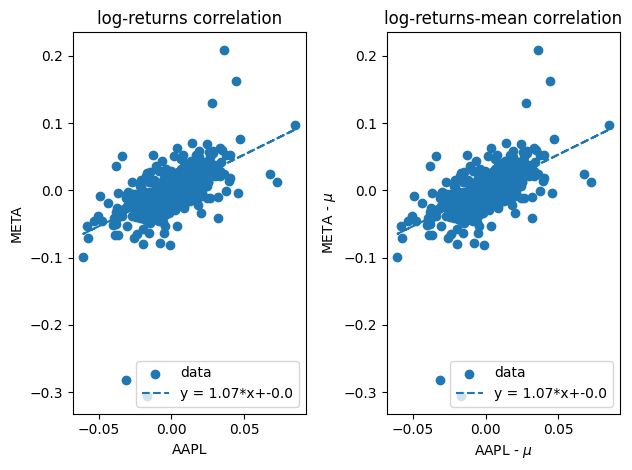

In [209]:
# log-returns
rAAPL = np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).flatten()
rMETA = np.log(META.Close[1:].values/META.Close.values[:-1]).flatten()
# means
muAAPL = np.mean(rAAPL)
muMETA = np.mean(rMETA)
# 1d fit
coef = np.polyfit(rAAPL, rMETA, 1)
poly1d_fn = np.poly1d(coef)
# plot
fig, ax = plt.subplots(1,2)
ax[0].scatter(rAAPL, rMETA, label='data')
ax[0].plot(rAAPL, poly1d_fn(rAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[0].set_xlabel('AAPL')
ax[0].set_ylabel('META')
ax[0].set_title('log-returns correlation')
ax[0].legend()

ax[1].scatter(rAAPL-muAAPL, rMETA-muMETA, label='data')
ax[1].plot(rAAPL-muAAPL, poly1d_fn(rAAPL-muAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[1].set_xlabel(r'AAPL - $\mu$')
ax[1].set_ylabel(r'META - $\mu$')
ax[1].set_title('log-returns-mean correlation')
ax[1].legend()

fig.tight_layout()
print('corr = %.3f'%np.corrcoef(rAAPL, rMETA)[0,1])

## monthly returns

In [149]:
AAPL.index[20:30]

DatetimeIndex(['2022-01-31 00:00:00+00:00', '2022-02-01 00:00:00+00:00',
               '2022-02-02 00:00:00+00:00', '2022-02-03 00:00:00+00:00',
               '2022-02-04 00:00:00+00:00', '2022-02-07 00:00:00+00:00',
               '2022-02-08 00:00:00+00:00', '2022-02-09 00:00:00+00:00',
               '2022-02-10 00:00:00+00:00', '2022-02-11 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', freq=None)

In [147]:
date = AAPL[AAPL.index==pd.tseries.offsets.BMonthEnd().rollforward(AAPL.index[0])+pd.tseries.offsets.DateOffset(months=1)+pd.tseries.offsets.BDay(0)].index[0]
date

Timestamp('2022-01-31 00:00:00+0000', tz='UTC')

In [163]:
# build an array of dates for each month
dates = [AAPL.index[0]]
idx = 0
for i in range(24):
    date = AAPL[AAPL.index==pd.tseries.offsets.BMonthEnd().rollforward(AAPL.index[idx])+pd.tseries.offsets.BMonthEnd(1)].index[0]
    idx = AAPL.index.get_loc(date)
    dates.append(date)
dates

[Timestamp('2021-12-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-01-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-02-28 00:00:00+0000', tz='UTC'),
 Timestamp('2022-03-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-04-29 00:00:00+0000', tz='UTC'),
 Timestamp('2022-05-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-06-30 00:00:00+0000', tz='UTC'),
 Timestamp('2022-07-29 00:00:00+0000', tz='UTC'),
 Timestamp('2022-08-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-09-30 00:00:00+0000', tz='UTC'),
 Timestamp('2022-10-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-11-30 00:00:00+0000', tz='UTC'),
 Timestamp('2022-12-30 00:00:00+0000', tz='UTC'),
 Timestamp('2023-01-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-02-28 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-04-28 00:00:00+0000', tz='UTC'),
 Timestamp('2023-05-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-06-30 00:00:00+0000', tz='UTC'),
 Timestamp('2023-07-31 00:00:00+0000', tz='UTC'),


In [159]:
idx

501

In [160]:
i

23

In [161]:
dates

[Timestamp('2022-02-28 00:00:00+0000', tz='UTC'),
 Timestamp('2022-03-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-04-29 00:00:00+0000', tz='UTC'),
 Timestamp('2022-05-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-06-30 00:00:00+0000', tz='UTC'),
 Timestamp('2022-07-29 00:00:00+0000', tz='UTC'),
 Timestamp('2022-08-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-09-30 00:00:00+0000', tz='UTC'),
 Timestamp('2022-10-31 00:00:00+0000', tz='UTC'),
 Timestamp('2022-11-30 00:00:00+0000', tz='UTC'),
 Timestamp('2022-12-30 00:00:00+0000', tz='UTC'),
 Timestamp('2023-01-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-02-28 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-04-28 00:00:00+0000', tz='UTC'),
 Timestamp('2023-05-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-06-30 00:00:00+0000', tz='UTC'),
 Timestamp('2023-07-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-08-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-09-29 00:00:00+0000', tz='UTC'),


corr = 0.749


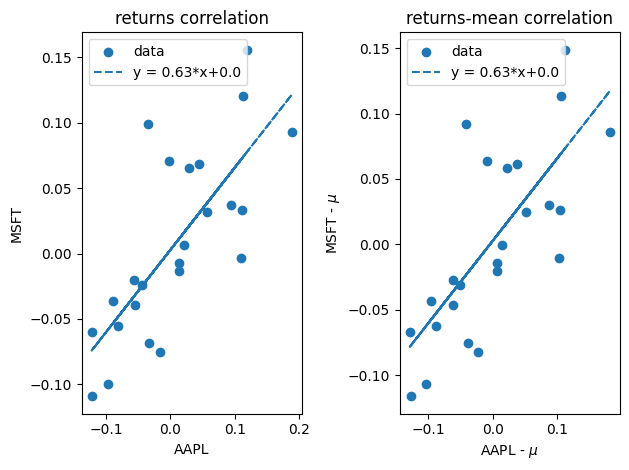

In [210]:
# monthly returns
rAAPL = (AAPL[AAPL.index.isin(dates)].Close[1:].values/AAPL[AAPL.index.isin(dates)].Close[:-1].values).flatten()-1
rMSFT = (MSFT[MSFT.index.isin(dates)].Close[1:].values/MSFT[MSFT.index.isin(dates)].Close.values[:-1]).flatten()-1
# means
muAAPL = np.mean(rAAPL)
muMSFT = np.mean(rMSFT)
# 1d fit
coef = np.polyfit(rAAPL, rMSFT, 1)
poly1d_fn = np.poly1d(coef)
# plot
fig, ax = plt.subplots(1,2)
ax[0].scatter(rAAPL, rMSFT, label='data')
ax[0].plot(rAAPL, poly1d_fn(rAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[0].set_xlabel('AAPL')
ax[0].set_ylabel('MSFT')
ax[0].set_title('returns correlation')
ax[0].legend()

ax[1].scatter(rAAPL-muAAPL, rMSFT-muMSFT, label='data')
ax[1].plot(rAAPL-muAAPL, poly1d_fn(rAAPL-muAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[1].set_xlabel(r'AAPL - $\mu$')
ax[1].set_ylabel(r'MSFT - $\mu$')
ax[1].set_title('returns-mean correlation')
ax[1].legend()

fig.tight_layout()
print('corr = %.3f'%np.corrcoef(rAAPL,rMSFT)[0,1])

In [216]:
AAPLc = AAPL.copy()
AAPLc['Return', 'AAPL'] = np.insert((AAPLc.Close.values[1:]/AAPLc.Close.values[:-1]).flatten()-1, 0, 1)
AAPLc.head()

Price,Adj Close,Close,High,Low,Open,Volume,Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,
2021-12-31 00:00:00+00:00,174.708191,177.570007,179.229996,177.259995,178.089996,64062300,1.000000
2022-01-03 00:00:00+00:00,179.076569,182.009995,182.880005,177.710007,177.830002,104487900,0.025004
2022-01-04 00:00:00+00:00,176.803802,179.699997,182.940002,179.119995,182.630005,99310400,-0.012692
2022-01-05 00:00:00+00:00,172.100861,174.919998,180.169998,174.639999,179.610001,94537600,-0.026600
2022-01-06 00:00:00+00:00,169.227921,172.000000,175.300003,171.639999,172.699997,96904000,-0.016693


In [220]:
(AAPLc['Return'].values[1:21].flatten()+1)*(AAPLc['Return'].values[:20].flatten()+1)

array([2.0500083 , 1.01199521, 0.96104612, 0.95715082, 0.98427853,
       1.00110467, 1.01690192, 1.01939716, 0.98349326, 0.98598535,
       0.98611999, 0.96047835, 0.96884565, 0.97701984, 0.98243268,
       0.98380639, 0.98805845, 0.9964952 , 1.06662909, 1.0977264 ])

In [223]:
(AAPLc['Return'].values[0].flatten()+1)

array([2.])

In [174]:
(AAPL[AAPL.index==dates[1]].Close.values/AAPL[AAPL.index==dates[0]].Close.values)[0][0]

0.9842878389939598

In [175]:
AAPL.index.get_loc(dates[0]), AAPL.index.get_loc(dates[1])

(0, 20)

In [179]:
AAPL[AAPL.index==dates[0]]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2021-12-31 00:00:00+00:00,174.708191,177.570007,179.229996,177.259995,178.089996,64062300


In [180]:
AAPL[AAPL.index==dates[1]]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-01-31 00:00:00+00:00,171.96312,174.779999,175.0,169.509995,170.160004,115541600


In [189]:
a = (AAPL[AAPL.index>=dates[0]].loc[AAPL.index<=dates[1]].Close.values[1:]/AAPL[AAPL.index>=dates[0]].loc[AAPL.index<=dates[1]].Close.values[:-1]).flatten()
a

array([1.02500415, 0.9873084 , 0.97340012, 0.98330666, 1.00098836,
       1.00011619, 1.01678378, 1.00257024, 0.98097193, 1.00511066,
       0.98110589, 0.97897522, 0.98965288, 0.98723487, 0.99513571,
       0.98861529, 0.99943675, 0.99705679, 1.06977767, 1.02612574])

In [191]:
len(a)

20

In [192]:
len(AAPL[AAPL.index>=dates[0]].loc[AAPL.index<=dates[1]])

21

In [169]:
AAPL[dates[0]:dates[1]].Close.values[1:].flatten()/AAPL[dates[0]:dates[1]].Close.values[:-1].flatten()

array([1.02500415, 0.9873084 , 0.97340012, 0.98330666, 1.00098836,
       1.00011619, 1.01678378, 1.00257024, 0.98097193, 1.00511066,
       0.98110589, 0.97897522, 0.98965288, 0.98723487, 0.99513571,
       0.98861529, 0.99943675, 0.99705679, 1.06977767, 1.02612574])

In [170]:
(AAPL.Close.values[22:41]/AAPL.Close.values[21:40]).flatten()*np.insert((AAPL.Close.values[23:41]/AAPL.Close.values[22:40]).flatten(),0,1)

array([1.00704425, 0.96684003, 0.9941094 , 0.99154881, 1.03727447,
       1.01665629, 0.95335922, 0.95997193, 1.00284839, 1.04684097,
       0.9972241 , 0.95791401, 0.981376  , 0.9646927 , 0.94894062,
       1.03363861, 1.02609904, 1.00327825, 0.97687942])

In [190]:
a[1:]*a[:-1]

array([1.01199521, 0.96104612, 0.95715082, 0.98427853, 1.00110467,
       1.01690192, 1.01939716, 0.98349326, 0.98598535, 0.98611999,
       0.96047835, 0.96884565, 0.97701984, 0.98243268, 0.98380639,
       0.98805845, 0.9964952 , 1.06662909, 1.0977264 ])

corr = 0.338


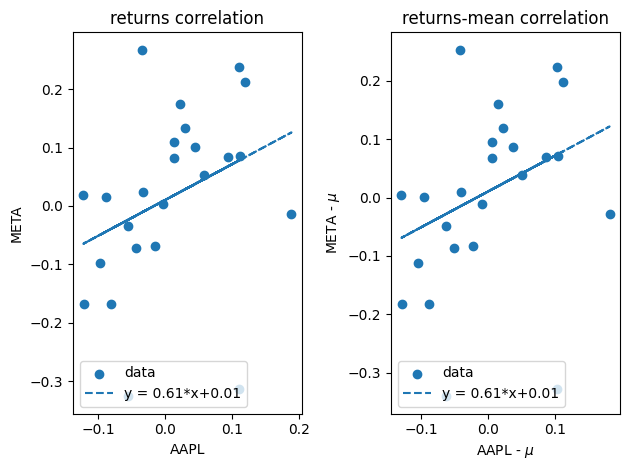

In [211]:
# monthly returns
rAAPL = (AAPL[AAPL.index.isin(dates)].Close[1:].values/AAPL[AAPL.index.isin(dates)].Close[:-1].values).flatten()-1
rMETA = (META[META.index.isin(dates)].Close[1:].values/META[META.index.isin(dates)].Close.values[:-1]).flatten()-1
# means
muAAPL = np.mean(rAAPL)
muMETA = np.mean(rMETA)
# 1d fit
coef = np.polyfit(rAAPL, rMETA, 1)
poly1d_fn = np.poly1d(coef)
# plot
fig, ax = plt.subplots(1,2)
ax[0].scatter(rAAPL, rMETA, label='data')
ax[0].plot(rAAPL, poly1d_fn(rAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[0].set_xlabel('AAPL')
ax[0].set_ylabel('META')
ax[0].set_title('returns correlation')
ax[0].legend()

ax[1].scatter(rAAPL-muAAPL, rMETA-muMETA, label='data')
ax[1].plot(rAAPL-muAAPL, poly1d_fn(rAAPL-muAAPL), '--', label=f'y = {np.round(coef[0],2)}*x+{np.round(coef[1],2)}')
ax[1].set_xlabel(r'AAPL - $\mu$')
ax[1].set_ylabel(r'META - $\mu$')
ax[1].set_title('returns-mean correlation')
ax[1].legend()

fig.tight_layout()
print('corr = %.3f'%np.corrcoef(rAAPL,rMETA)[0,1])

In [105]:
df = pd.DataFrame()
df['AAPL'] = [rAAPL[-1]]
df['MSFT'] = [rMSFT[-1]]
df['META'] = [rMETA[-1]]
df

,AAPL,MSFT,META
0,0.09927,0.08218,0.041591


In [104]:
rAAPL[-1]

0.09927001294063187

Given

# Appendix 1: pick appropiate data window for historical data

## from 12-31-2013 to 12-31-2023

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL,MSFT,META
count,2517.000000,2517.000000,2517.000000
mean,77.897723,149.811462,178.080064
std,56.227432,101.644709,81.187836
min,17.849285,34.980000,53.529999
25%,29.777500,55.669998,115.400002
50%,48.070000,109.669998,170.240005
75%,134.509995,243.000000,219.759995
max,198.110001,382.700012,382.179993


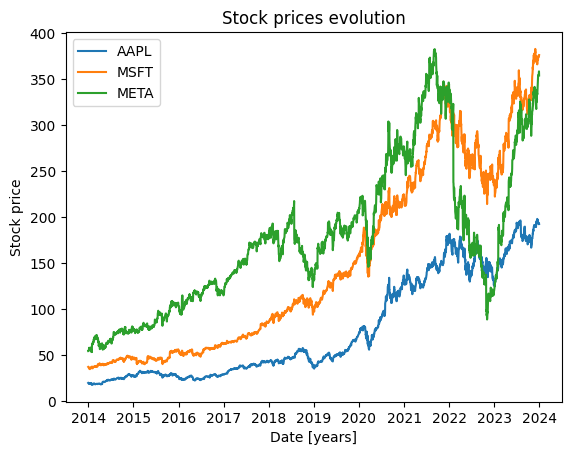

In [4]:
start = '2013-12-31'
end = '2023-12-31'
AAPL = yf.download('AAPL', start=start, end=end)
MSFT = yf.download('MSFT', start=start, end=end)
META = yf.download('META', start=start, end=end)

# plot stock prices at close

plt.title('Stock prices evolution')
plt.xlabel('Date [years]')
plt.ylabel('Stock price')
plt.plot(AAPL.index, AAPL.Close, label='AAPL')
plt.plot(MSFT.index, MSFT.Close, label='MSFT')
plt.plot(META.index, META.Close, label='META')
plt.legend()

# stats on Stock prices
df = pd.concat([AAPL.Close.describe(), MSFT.Close.describe(), META.Close.describe()], axis=1)

df


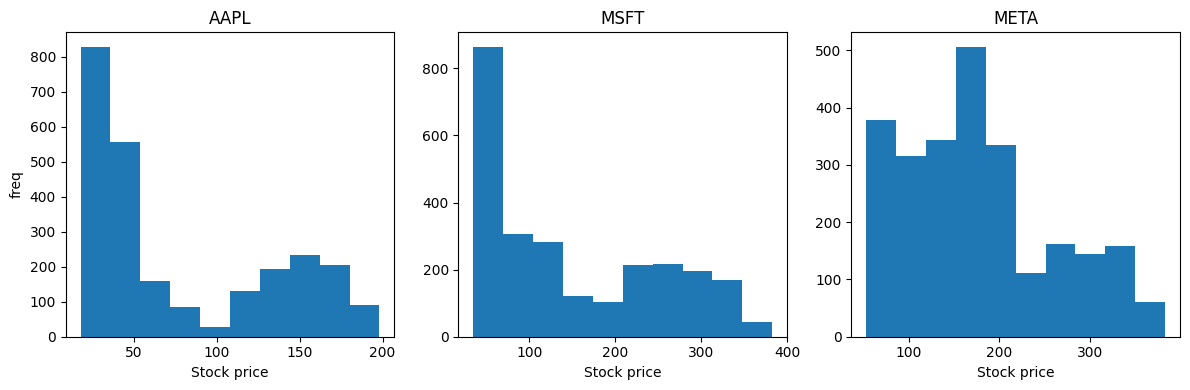

returns

           returns      returns      returns
count  2517.000000  2517.000000  2517.000000
mean      0.001059     0.001063     0.001024
std       0.017882     0.017057     0.023557
min      -0.128647    -0.147390    -0.263901
25%      -0.007282    -0.006911    -0.009474
50%       0.000891     0.000786     0.001070
75%       0.010145     0.009796     0.012325
max       0.119808     0.142169     0.232824


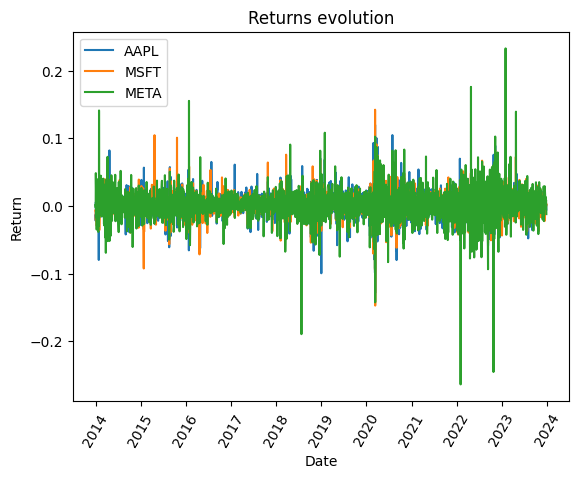

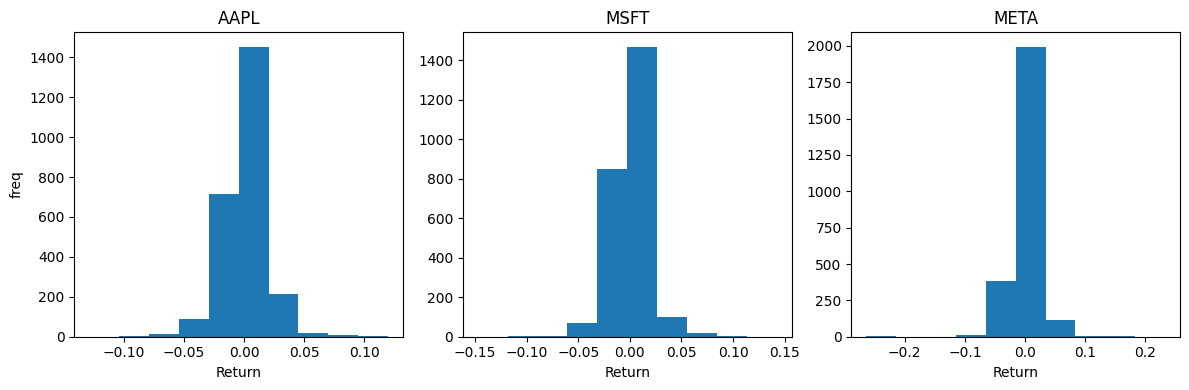


Log-returns

       Log-returns  Log-returns  Log-returns
count  2517.000000  2517.000000  2517.000000
mean      0.000899     0.000917     0.000742
std       0.017889     0.017047     0.023817
min      -0.137708    -0.159453    -0.306391
25%      -0.007309    -0.006935    -0.009519
50%       0.000890     0.000786     0.001069
75%       0.010094     0.009748     0.012250
max       0.113157     0.132929     0.209307


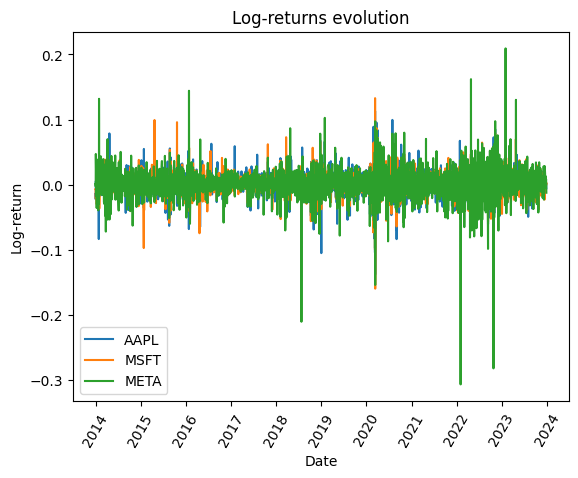

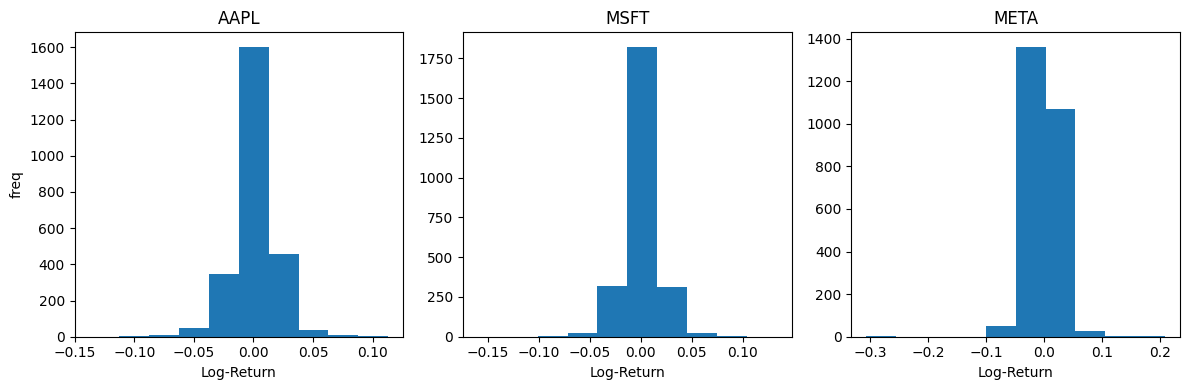

In [5]:
# do stock prices follow a lognormal  distribution?
# plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(AAPL.Close)
ax[0].set_title('AAPL')
ax[0].set_xlabel('Stock price')
ax[0].set_ylabel('freq')

ax[1].hist(MSFT.Close)
ax[1].set_title('MSFT')
ax[1].set_xlabel('Stock price')


ax[2].hist(META.Close)
ax[2].set_title('META')
ax[2].set_xlabel('Stock price')

fig.tight_layout()

plt.show()
# Let's see the evolution of returns

# plot returns
plt.Figure()
plt.title('Returns evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Return')
plt.plot(AAPL.index[:-1], AAPL.Close[1:].values/AAPL.Close[:-1].values-1, label='AAPL')
plt.plot(MSFT.index[:-1], MSFT.Close[1:].values/MSFT.Close[:-1].values-1, label='MSFT')
plt.plot(META.index[:-1], META.Close[1:].values/META.Close[:-1].values-1, label='META')
plt.legend()

# stats on returns
AAPL['returns'] = np.insert((AAPL.Close[1:].values/AAPL.Close[:-1].values-1).flatten(), 0, 0)
MSFT['returns'] = np.insert((MSFT.Close[1:].values/MSFT.Close[:-1].values-1).flatten(), 0, 0)
META['returns'] = np.insert((META.Close[1:].values/META.Close[:-1].values-1).flatten(), 0, 0)
df = pd.concat([AAPL.returns.describe(), MSFT.returns.describe(), META.returns.describe()], axis=1)
print('returns\n')
print(df)

# plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(AAPL.Close[1:].values/AAPL.Close[:-1].values-1)
ax[0].set_title('AAPL')
ax[0].set_xlabel('Return')
ax[0].set_ylabel('freq')

ax[1].hist(MSFT.Close[1:].values/MSFT.Close[:-1].values-1)
ax[1].set_title('MSFT')
ax[1].set_xlabel('Return')


ax[2].hist(META.Close[1:].values/META.Close[:-1].values-1)
ax[2].set_title('META')
ax[2].set_xlabel('Return')

fig.tight_layout()

plt.show()

# Let's see the evolution of log-returns

# stats on log-returns
AAPL['Log-returns'] = np.insert(np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).flatten(), 0, 0)
MSFT['Log-returns'] = np.insert(np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).flatten(), 0, 0)
META['Log-returns'] = np.insert(np.log(META.Close[1:].values/META.Close[:-1].values).flatten(), 0, 0)
df = pd.concat([AAPL['Log-returns'].describe(), MSFT['Log-returns'].describe(), META['Log-returns'].describe()], axis=1)

print('\nLog-returns\n')
print(df)

# plot log-returns
plt.Figure()
plt.title('Log-returns evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Log-return')
plt.plot(AAPL.index[:-1], np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values), label='AAPL')
plt.plot(MSFT.index[:-1], np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values), label='MSFT')
plt.plot(META.index[:-1], np.log(META.Close[1:].values/META.Close[:-1].values), label='META')
plt.legend()

# plot log-returns histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values))
ax[0].set_title('AAPL')
ax[0].set_xlabel('Log-Return')
ax[0].set_ylabel('freq')

ax[1].hist(np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values))
ax[1].set_title('MSFT')
ax[1].set_xlabel('Log-Return')


ax[2].hist(np.log(META.Close[1:].values/META.Close[:-1].values))
ax[2].set_title('META')
ax[2].set_xlabel('Log-Return')

fig.tight_layout()


## data before 2020

Stock price

Ticker         AAPL         MSFT         META
count   1511.000000  1511.000000  1511.000000
mean      36.012965    74.597505   130.621496
std       11.701860    32.644069    44.592705
min       17.849285    34.980000    53.529999
25%       26.965000    47.000000    86.364998
50%       32.340000    62.639999   129.070007
75%       43.958752   101.085003   172.570000
max       73.412498   158.960007   217.500000


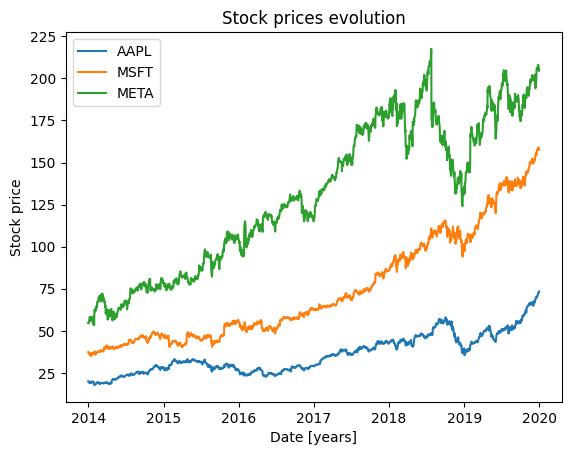

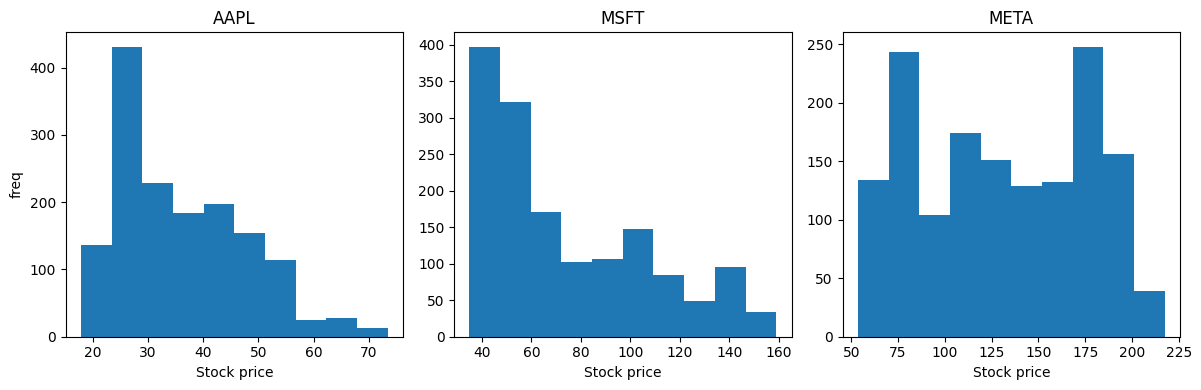

/tmp/ipykernel_119822/1357021824.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL1['returns'] = np.insert((AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).flatten(), 0, 0)
/tmp/ipykernel_119822/1357021824.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT1['returns'] = np.insert((MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).flatten(), 0, 0)
/tmp/ipykernel_119822/1357021824.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

returns before 2020

           returns      returns      returns
count  1511.000000  1511.000000  1511.000000
mean      0.000978     0.001054     0.001050
std       0.015334     0.014271     0.018627
min      -0.099607    -0.092533    -0.189609
25%      -0.006020    -0.005874    -0.007469
50%       0.000888     0.000736     0.001056
75%       0.008903     0.008045     0.010737
max       0.081982     0.104522     0.155214


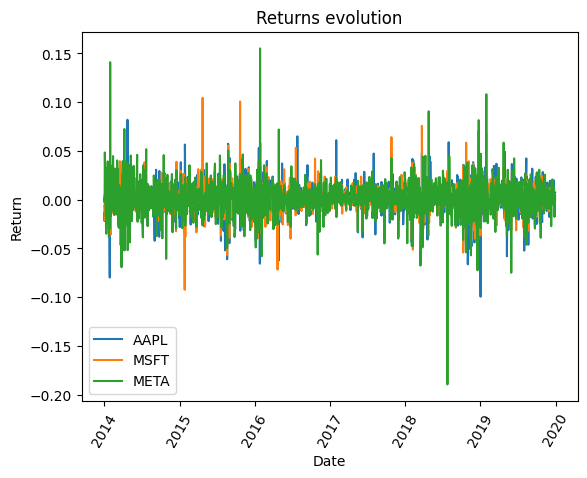

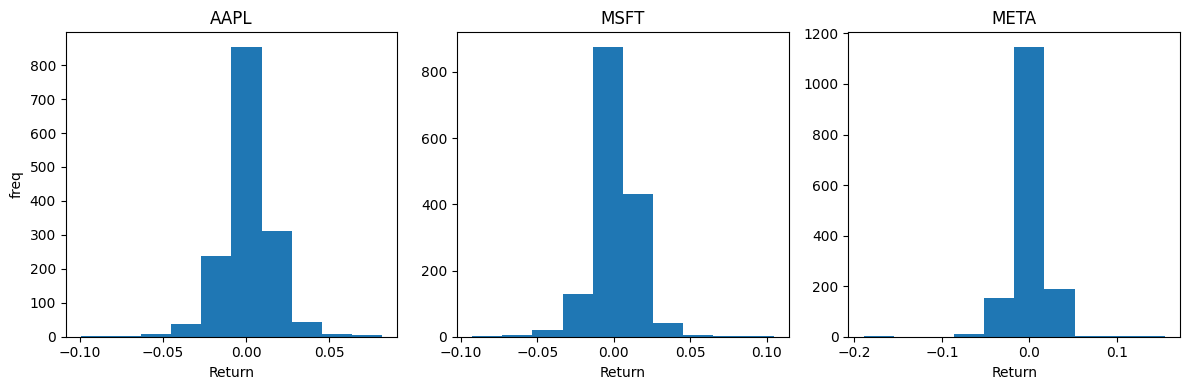

/tmp/ipykernel_119822/1357021824.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL1['Log-returns'] = np.insert(np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).flatten(), 0, 0)
/tmp/ipykernel_119822/1357021824.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT1['Log-returns'] = np.insert(np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).flatten(), 0, 0)
/tmp/ipykernel_119822/1357021824.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Log-returns

       Log-returns  Log-returns  Log-returns
count  1511.000000  1511.000000  1511.000000
mean      0.000859     0.000952     0.000876
std       0.015357     0.014240     0.018671
min      -0.104924    -0.097099    -0.210239
25%      -0.006038    -0.005891    -0.007497
50%       0.000888     0.000736     0.001056
75%       0.008864     0.008013     0.010680
max       0.078794     0.099413     0.144286


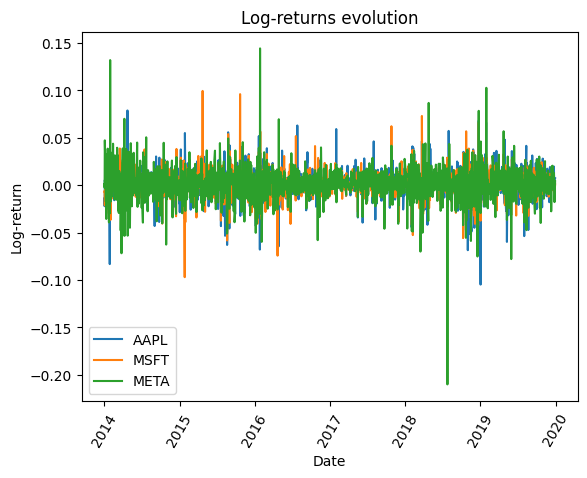

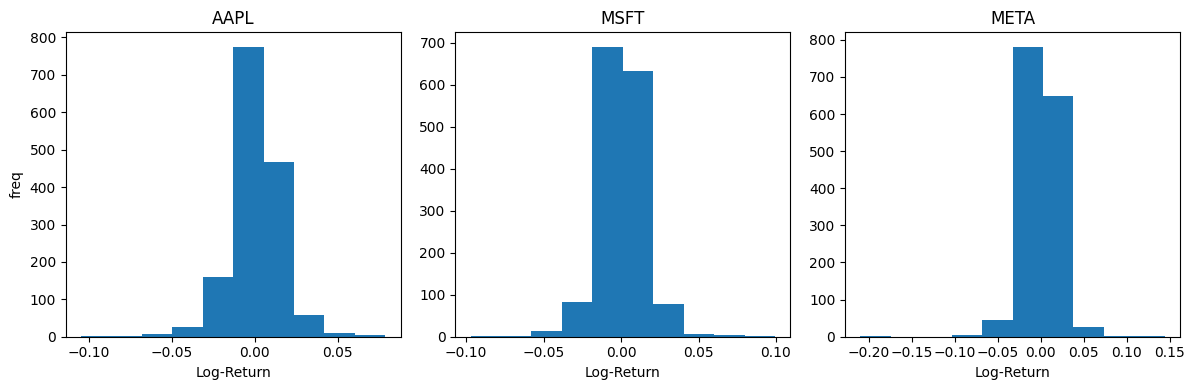

In [6]:
# Stock prices don't look lognormal. They look bimodal. What if we only take into 
# account data before COVID?

tf = '2020-01-01'

AAPL1 = AAPL[AAPL.index<=tf]
MSFT1 = MSFT[MSFT.index<=tf]
META1 = META[META.index<=tf]

# plot stock price
plt.title('Stock prices evolution')
plt.xlabel('Date [years]')
plt.ylabel('Stock price')
plt.plot(AAPL1.index, AAPL1.Close, label='AAPL')
plt.plot(MSFT1.index, MSFT1.Close, label='MSFT')
plt.plot(META1.index, META1.Close, label='META')
plt.legend()

# stats on stock price
df = pd.concat([AAPL1.Close.describe(), MSFT1.Close.describe(), META1.Close.describe()], axis=1)
print('Stock price\n')
print(df)

#plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(AAPL1.Close)
ax[0].set_title('AAPL')
ax[0].set_xlabel('Stock price')
ax[0].set_ylabel('freq')

ax[1].hist(MSFT1.Close)
ax[1].set_title('MSFT')
ax[1].set_xlabel('Stock price')


ax[2].hist(META1.Close)
ax[2].set_title('META')
ax[2].set_xlabel('Stock price')

fig.tight_layout()
plt.show()
# Let's see the evolution of returns

# stats on returns
AAPL1['returns'] = np.insert((AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).flatten(), 0, 0)
MSFT1['returns'] = np.insert((MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).flatten(), 0, 0)
META1['returns'] = np.insert((META1.Close[1:].values/META1.Close[:-1].values-1).flatten(), 0, 0)
df = pd.concat([AAPL1.returns.describe(), MSFT1.returns.describe(), META1.returns.describe()], axis=1)
print('returns before 2020\n')
print(df)

# plot returns
plt.Figure()
plt.title('Returns evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Return')
plt.plot(AAPL1.index[:-1], AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1, label='AAPL')
plt.plot(MSFT1.index[:-1], MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1, label='MSFT')
plt.plot(META1.index[:-1], META1.Close[1:].values/META1.Close[:-1].values-1, label='META')
plt.legend()

# plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1)
ax[0].set_title('AAPL')
ax[0].set_xlabel('Return')
ax[0].set_ylabel('freq')

ax[1].hist(MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1)
ax[1].set_title('MSFT')
ax[1].set_xlabel('Return')


ax[2].hist(META1.Close[1:].values/META1.Close[:-1].values-1)
ax[2].set_title('META')
ax[2].set_xlabel('Return')

fig.tight_layout()
plt.show()
# Let's see the evolution of log-returns

# stats on log-returns
AAPL1['Log-returns'] = np.insert(np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).flatten(), 0, 0)
MSFT1['Log-returns'] = np.insert(np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).flatten(), 0, 0)
META1['Log-returns'] = np.insert(np.log(META1.Close[1:].values/META1.Close[:-1].values).flatten(), 0, 0)
df = pd.concat([AAPL1['Log-returns'].describe(), MSFT1['Log-returns'].describe(), META1['Log-returns'].describe()], axis=1)
print('Log-returns\n')
print(df)

# plot log-returns
plt.Figure()
plt.title('Log-returns evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Log-return')
plt.plot(AAPL1.index[:-1], np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values), label='AAPL')
plt.plot(MSFT1.index[:-1], np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values), label='MSFT')
plt.plot(META1.index[:-1], np.log(META1.Close[1:].values/META1.Close[:-1].values), label='META')
plt.legend()

# plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values))
ax[0].set_title('AAPL')
ax[0].set_xlabel('Log-Return')
ax[0].set_ylabel('freq')

ax[1].hist(np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values))
ax[1].set_title('MSFT')
ax[1].set_xlabel('Log-Return')


ax[2].hist(np.log(META1.Close[1:].values/META1.Close[:-1].values))
ax[2].set_title('META')
ax[2].set_xlabel('Log-Return')

fig.tight_layout()

then it looks more lognormally distributed, at least for AAPL and MSFT, but it's further away of the date of interest. If we consider data after COVID, then the distribution doesn't look lognormal either, but at least it seems to have only one mean.

## data after 2022

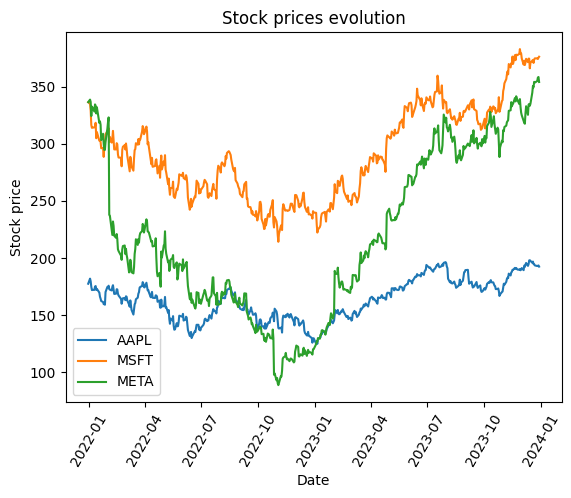

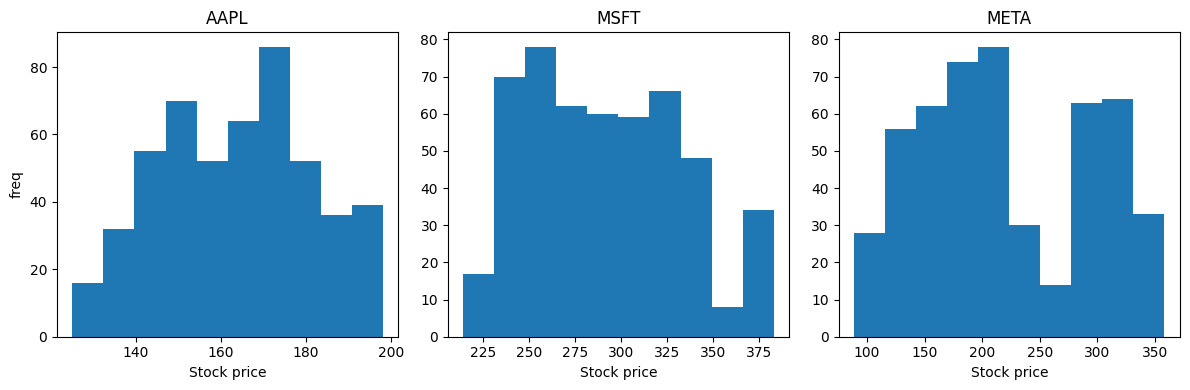

/tmp/ipykernel_119822/1638111112.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL2['returns'] = np.insert((AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).flatten(), 0, 0)
/tmp/ipykernel_119822/1638111112.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT2['returns'] = np.insert((MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).flatten(), 0, 0)
/tmp/ipykernel_119822/1638111112.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

returns after 2022

          returns     returns     returns
count  502.000000  502.000000  502.000000
mean     0.000328    0.000409    0.000690
std      0.018311    0.019332    0.033862
min     -0.058680   -0.077156   -0.263901
25%     -0.009585   -0.010973   -0.013103
50%      0.000573    0.000186    0.000542
75%      0.010134    0.012203    0.015587
max      0.088975    0.082268    0.232824


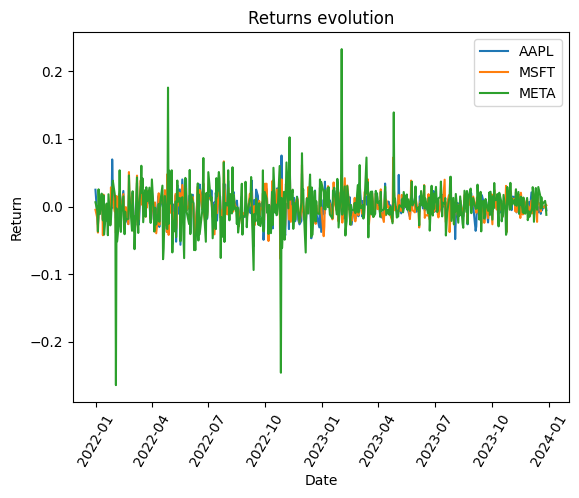

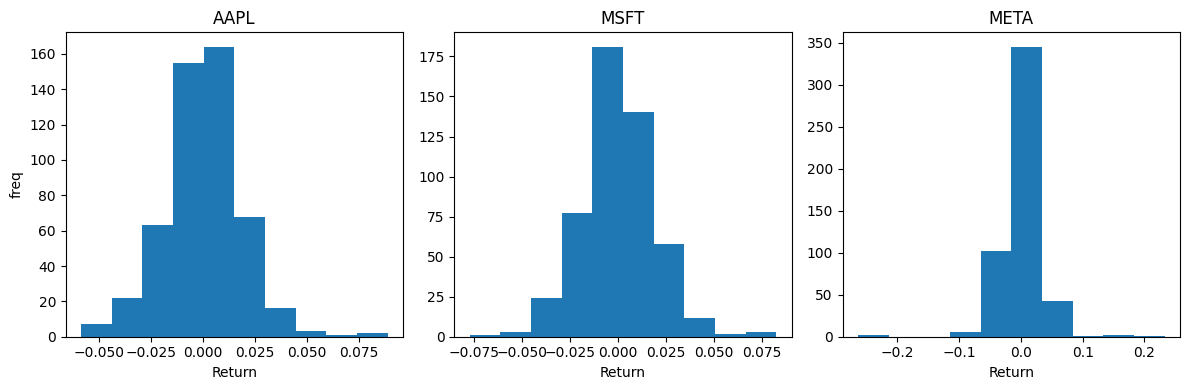

/tmp/ipykernel_119822/1638111112.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL2['Log-returns'] = np.insert(np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).flatten(), 0, 0)
/tmp/ipykernel_119822/1638111112.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MSFT2['Log-returns'] = np.insert(np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).flatten(), 0, 0)
/tmp/ipykernel_119822/1638111112.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Log-returns

       Log-returns  Log-returns  Log-returns
count   502.000000   502.000000   502.000000
mean      0.000161     0.000222     0.000102
std       0.018289     0.019312     0.034644
min      -0.060472    -0.080295    -0.306391
25%      -0.009631    -0.011034    -0.013190
50%       0.000573     0.000186     0.000542
75%       0.010083     0.012129     0.015466
max       0.085236     0.079059     0.209307


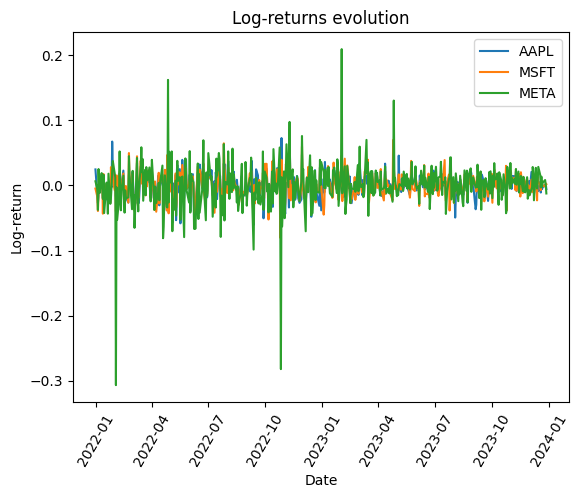

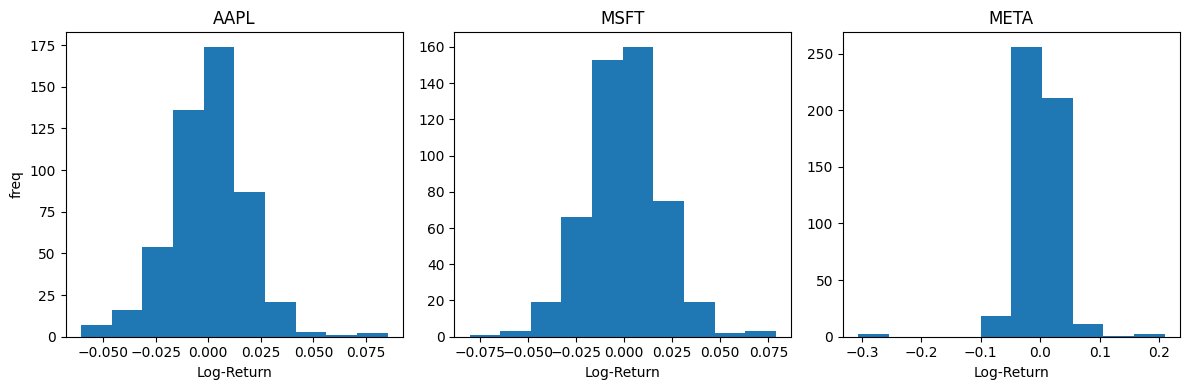

In [7]:
# Only take into account data after 2022

t0 = '2021-12-31'

AAPL2 = AAPL[AAPL.index>=t0]
MSFT2 = MSFT[MSFT.index>=t0]
META2 = META[META.index>=t0]

# plot Stock price
plt.title('Stock prices evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Stock price')
plt.plot(AAPL2.index, AAPL2.Close, label='AAPL')
plt.plot(MSFT2.index, MSFT2.Close, label='MSFT')
plt.plot(META2.index, META2.Close, label='META')
plt.legend()

# plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(AAPL2.Close)
ax[0].set_title('AAPL')
ax[0].set_xlabel('Stock price')
ax[0].set_ylabel('freq')

ax[1].hist(MSFT2.Close)
ax[1].set_title('MSFT')
ax[1].set_xlabel('Stock price')


ax[2].hist(META2.Close)
ax[2].set_title('META')
ax[2].set_xlabel('Stock price')

fig.tight_layout()
plt.show()

# Let's see the evolution of returns

# stats on returns
AAPL2['returns'] = np.insert((AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).flatten(), 0, 0)
MSFT2['returns'] = np.insert((MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).flatten(), 0, 0)
META2['returns'] = np.insert((META2.Close[1:].values/META2.Close[:-1].values-1).flatten(), 0, 0)
df = pd.concat([AAPL2.returns.describe(), MSFT2.returns.describe(), META2.returns.describe()], axis=1)
print('returns after 2022\n')
print(df)

# plot returns
plt.Figure()
plt.title('Returns evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Return')
plt.plot(AAPL2.index[:-1], AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1, label='AAPL')
plt.plot(MSFT2.index[:-1], MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1, label='MSFT')
plt.plot(META2.index[:-1], META2.Close[1:].values/META2.Close[:-1].values-1, label='META')
plt.legend()

# plot histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1)
ax[0].set_title('AAPL')
ax[0].set_xlabel('Return')
ax[0].set_ylabel('freq')

ax[1].hist(MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1)
ax[1].set_title('MSFT')
ax[1].set_xlabel('Return')


ax[2].hist(META2.Close[1:].values/META2.Close[:-1].values-1)
ax[2].set_title('META')
ax[2].set_xlabel('Return')

fig.tight_layout()
plt.show()

# Let's see the evolution of log-returns

# stats on log-returns
AAPL2['Log-returns'] = np.insert(np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).flatten(), 0, 0)
MSFT2['Log-returns'] = np.insert(np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).flatten(), 0, 0)
META2['Log-returns'] = np.insert(np.log(META2.Close[1:].values/META2.Close[:-1].values).flatten(), 0, 0)
df = pd.concat([AAPL2['Log-returns'].describe(), MSFT2['Log-returns'].describe(), META2['Log-returns'].describe()], axis=1)
print('Log-returns\n')
print(df)

# plot log-returns
plt.Figure()
plt.title('Log-returns evolution')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Log-return')
plt.plot(AAPL2.index[:-1], np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values), label='AAPL')
plt.plot(MSFT2.index[:-1], np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values), label='MSFT')
plt.plot(META2.index[:-1], np.log(META2.Close[1:].values/META2.Close[:-1].values), label='META')
plt.legend()

# plot log-returns histograms
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].hist(np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values))
ax[0].set_title('AAPL')
ax[0].set_xlabel('Log-Return')
ax[0].set_ylabel('freq')

ax[1].hist(np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values))
ax[1].set_title('MSFT')
ax[1].set_xlabel('Log-Return')


ax[2].hist(np.log(META2.Close[1:].values/META2.Close[:-1].values))
ax[2].set_title('META')
ax[2].set_xlabel('Log-Return')

fig.tight_layout()

## Summary

### Stock price

2013-2023   2013-2020   2022-2023
Ticker stats                                    
AAPL   mean    77.897723   36.012965  163.702032
       std     56.227432   11.701860   17.697029
MSFT   mean   149.811462   74.597505  291.478606
       std    101.644709   32.644069   40.947385
META   mean   178.080064  130.621496  220.955239
       std     81.187836   44.592705   72.516441

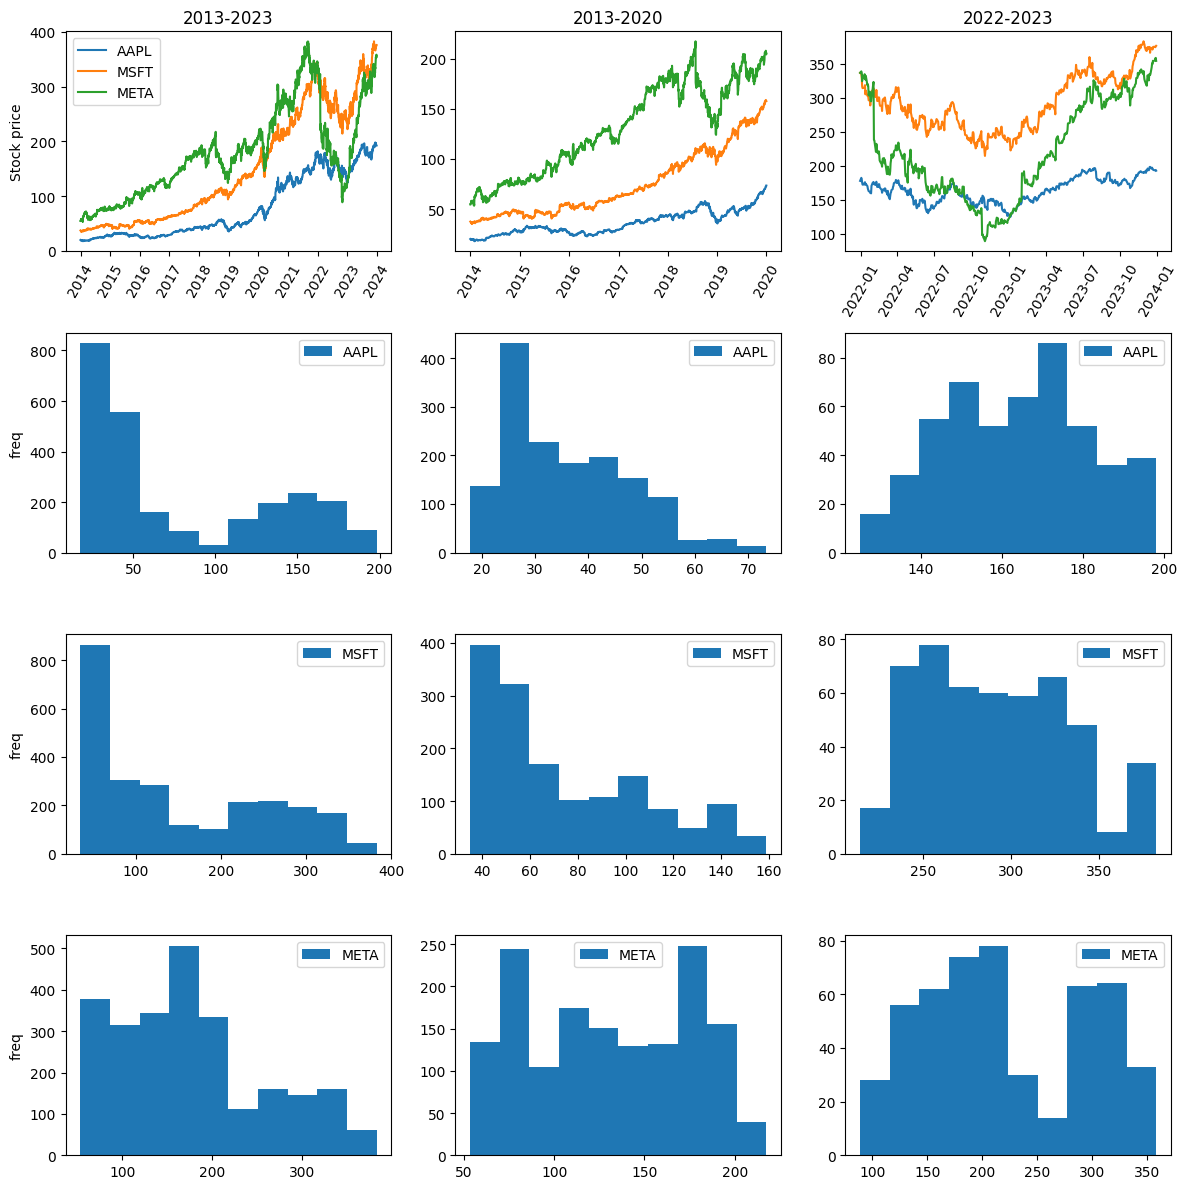

In [9]:
fig, ax = plt.subplots(4, 3, figsize=(12,12))

# plot stock price for 3 time windows
ax[0,0].plot(AAPL.Close, label='AAPL')
ax[0,0].plot(MSFT.Close, label='MSFT')
ax[0,0].plot(META.Close, label='META')
ax[0,0].set_title('2013-2023')
ax[0,0].set_ylabel('Stock price')
ax[0,0].tick_params('x', rotation=60)
ax[0,0].legend()

ax[0,1].plot(AAPL1.Close, label='AAPL')
ax[0,1].plot(MSFT1.Close, label='MSFT')
ax[0,1].plot(META1.Close, label='META')
ax[0,1].set_title('2013-2020')
ax[0,1].tick_params('x', rotation=60)

ax[0,2].plot(AAPL2.Close, label='AAPL')
ax[0,2].plot(MSFT2.Close, label='MSFT')
ax[0,2].plot(META2.Close, label='META')
ax[0,2].set_title('2022-2023')
ax[0,2].tick_params('x', rotation=60)

# plot stock price distribution for AAPL for 3 time windows
ax[1,0].hist(AAPL.Close, label='AAPL')
ax[1,0].set_ylabel('freq')
ax[1,0].legend()

ax[1,1].hist(AAPL1.Close, label='AAPL')
ax[1,1].legend()

ax[1,2].hist(AAPL2.Close, label='AAPL')
ax[1,2].legend()

# plot stock price distribution for MSFT for 3 time windows
ax[2,0].hist(MSFT.Close, label='MSFT')
ax[2,0].set_ylabel('freq')
ax[2,0].legend()

ax[2,1].hist(MSFT1.Close, label='MSFT')
ax[2,1].legend()

ax[2,2].hist(MSFT2.Close, label='MSFT')
ax[2,2].legend()

# plot stock price distribution for META for 3 time windows
ax[3,0].hist(META.Close, label='META')
ax[3,0].set_ylabel('freq')
ax[3,0].legend()

ax[3,1].hist(META1.Close, label='META')
ax[3,1].legend()

ax[3,2].hist(META2.Close, label='META')
ax[3,2].legend()

fig.tight_layout()


df = pd.DataFrame()
df['2013-2023'] = [AAPL.Close.mean().values[0], AAPL.Close.std().values[0], 
                   MSFT.Close.mean().values[0], MSFT.Close.std().values[0], 
                   META.Close.mean().values[0], META.Close.std().values[0]]
df['2013-2020'] = [AAPL1.Close.mean().values[0], AAPL1.Close.std().values[0],
                   MSFT1.Close.mean().values[0], MSFT1.Close.std().values[0],
                   META1.Close.mean().values[0], META1.Close.std().values[0]]
df['2022-2023'] = [AAPL2.Close.mean().values[0], AAPL2.Close.std().values[0],
                   MSFT2.Close.mean().values[0], MSFT2.Close.std().values[0],
                   META2.Close.mean().values[0], META2.Close.std().values[0]]
df.index = pd.MultiIndex.from_tuples([('AAPL', 'mean'), ('AAPL','std'),
                                      ('MSFT', 'mean'), ('MSFT','std'),
                                      ('META', 'mean'), ('META','std')  ], 
                                        names=['Ticker', 'stats'])
df


### Returns

2013-2023  2013-2020  2022-2023
Ticker stats                                 
AAPL   mean    0.001060   0.000978   0.000329
       std     0.017882   0.015334   0.018311
MSFT   mean    0.001063   0.001055   0.000409
       std     0.017057   0.014271   0.019332
META   mean    0.001024   0.001051   0.000691
       std     0.023557   0.018627   0.033862

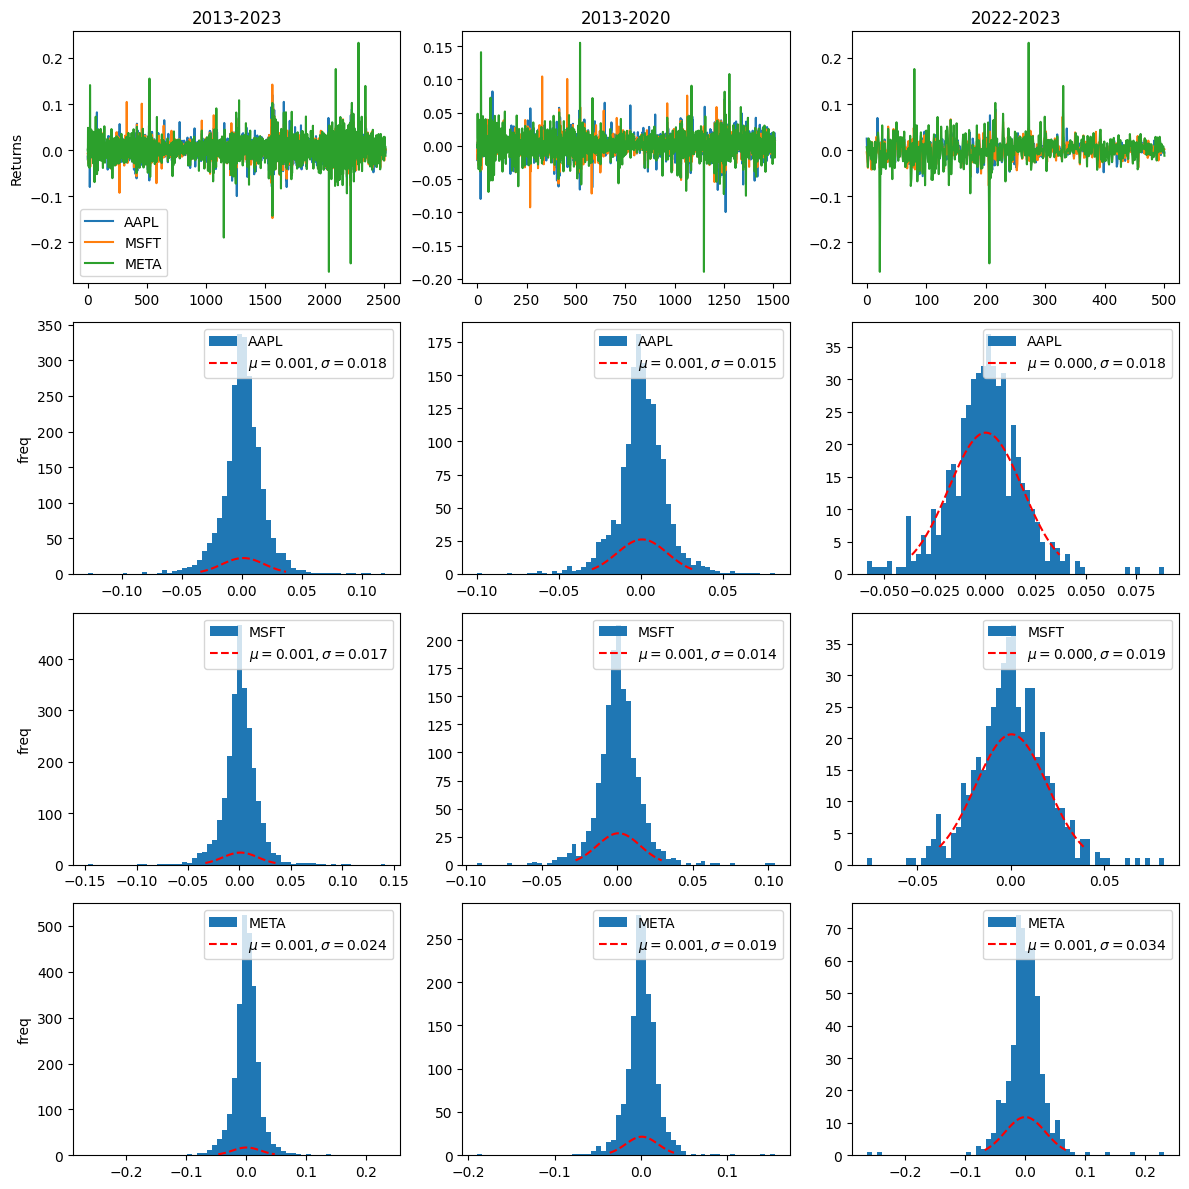

In [10]:
fig, ax = plt.subplots(4, 3, figsize=(12,12))

# plot returns for 3 time windows


ax[0,0].plot(AAPL.Close[1:].values/AAPL.Close[:-1].values-1, label='AAPL')
ax[0,0].plot(MSFT.Close[1:].values/MSFT.Close[:-1].values-1, label='MSFT')
ax[0,0].plot(META.Close[1:].values/META.Close[:-1].values-1, label='META')
ax[0,0].set_title('2013-2023')
ax[0,0].set_ylabel('Returns')
ax[0,0].legend()

ax[0,1].plot(AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1, label='AAPL')
ax[0,1].plot(MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1, label='MSFT')
ax[0,1].plot(META1.Close[1:].values/META1.Close[:-1].values-1, label='META')
ax[0,1].set_title('2013-2020')

ax[0,2].plot(AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1, label='AAPL')
ax[0,2].plot(MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1, label='MSFT')
ax[0,2].plot(META2.Close[1:].values/META2.Close[:-1].values-1, label='META')
ax[0,2].set_title('2022-2023')

# plot returns distribution for AAPL for 3 time windows

bins = 60
ax[1,0].hist(AAPL.Close[1:].values/AAPL.Close[:-1].values-1, label='AAPL', bins=bins)
ax[1,0].set_ylabel('freq')
mu, sigma = st.norm.fit(AAPL[1:].Close.values/AAPL[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[1,0].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[1,0].legend()

ax[1,1].hist(AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1, label='AAPL', bins=bins)
mu, sigma = st.norm.fit(AAPL1[1:].Close.values/AAPL1[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[1,1].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[1,1].legend()

ax[1,2].hist(AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1, label='AAPL', bins=bins)
mu, sigma = st.norm.fit(AAPL2[1:].Close.values/AAPL2[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[1,2].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[1,2].legend()

# plot returns distribution for MSFT for 3 time windows
ax[2,0].hist(MSFT.Close[1:].values/MSFT.Close[:-1].values-1, label='MSFT', bins=bins)
ax[2,0].set_ylabel('freq')
mu, sigma = st.norm.fit(MSFT[1:].Close.values/MSFT[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[2,0].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[2,0].legend()

ax[2,1].hist(MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1, label='MSFT', bins=bins)
mu, sigma = st.norm.fit(MSFT1[1:].Close.values/MSFT1[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[2,1].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[2,1].legend()

ax[2,2].hist(MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1, label='MSFT', bins=bins)
mu, sigma = st.norm.fit(MSFT2[1:].Close.values/MSFT2[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[2,2].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[2,2].legend()

# plot returns distribution for META for 3 time windows
ax[3,0].hist(META.Close[1:].values/META.Close[:-1].values-1, label='META', bins=bins)
mu, sigma = st.norm.fit(META[1:].Close.values/META[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[3,0].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[3,0].set_ylabel('freq')
ax[3,0].legend()

ax[3,1].hist(META1.Close[1:].values/META1.Close[:-1].values-1, label='META', bins=bins)
mu, sigma = st.norm.fit(META1[1:].Close.values/META1[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[3,1].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[3,1].legend()

ax[3,2].hist(META2.Close[1:].values/META2.Close[:-1].values-1, label='META', bins=bins)
mu, sigma = st.norm.fit(META2[1:].Close.values/META2[:-1].Close.values-1)
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[3,2].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[3,2].legend()

fig.tight_layout()


df = pd.DataFrame()
df['2013-2023'] = [(AAPL.Close[1:].values/AAPL.Close[:-1].values-1).mean(), (AAPL.Close[1:].values/AAPL.Close[:-1].values-1).std(), 
                   (MSFT.Close[1:].values/MSFT.Close[:-1].values-1).mean(), (MSFT.Close[1:].values/MSFT.Close[:-1].values-1).std(), 
                   (META.Close[1:].values/META.Close[:-1].values-1).mean(), (META.Close[1:].values/META.Close[:-1].values-1).std()]
df['2013-2020'] = [(AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).mean(), (AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).std(),
                   (MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).mean(), (MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).std(),
                   (META1.Close[1:].values/META1.Close[:-1].values-1).mean(), (META1.Close[1:].values/META1.Close[:-1].values-1).std()]
df['2022-2023'] = [(AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).mean(), (AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).std(),
                   (MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).mean(), (MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).std(),
                   (META2.Close[1:].values/META2.Close[:-1].values-1).mean(), (META2.Close[1:].values/META2.Close[:-1].values-1).std()]
df.index = pd.MultiIndex.from_tuples([('AAPL', 'mean'), ('AAPL','std'),
                                      ('MSFT', 'mean'), ('MSFT','std'),
                                      ('META', 'mean'), ('META','std')  ], 
                                        names=['Ticker', 'stats'])
df


### Log-returns

2013-2023  2013-2020  2022-2023
Ticker stats                                 
AAPL   mean    0.000899   0.000860   0.000161
       std     0.017889   0.015357   0.018289
MSFT   mean    0.000917   0.000953   0.000223
       std     0.017047   0.014240   0.019312
META   mean    0.000743   0.000876   0.000102
       std     0.023817   0.018671   0.034644

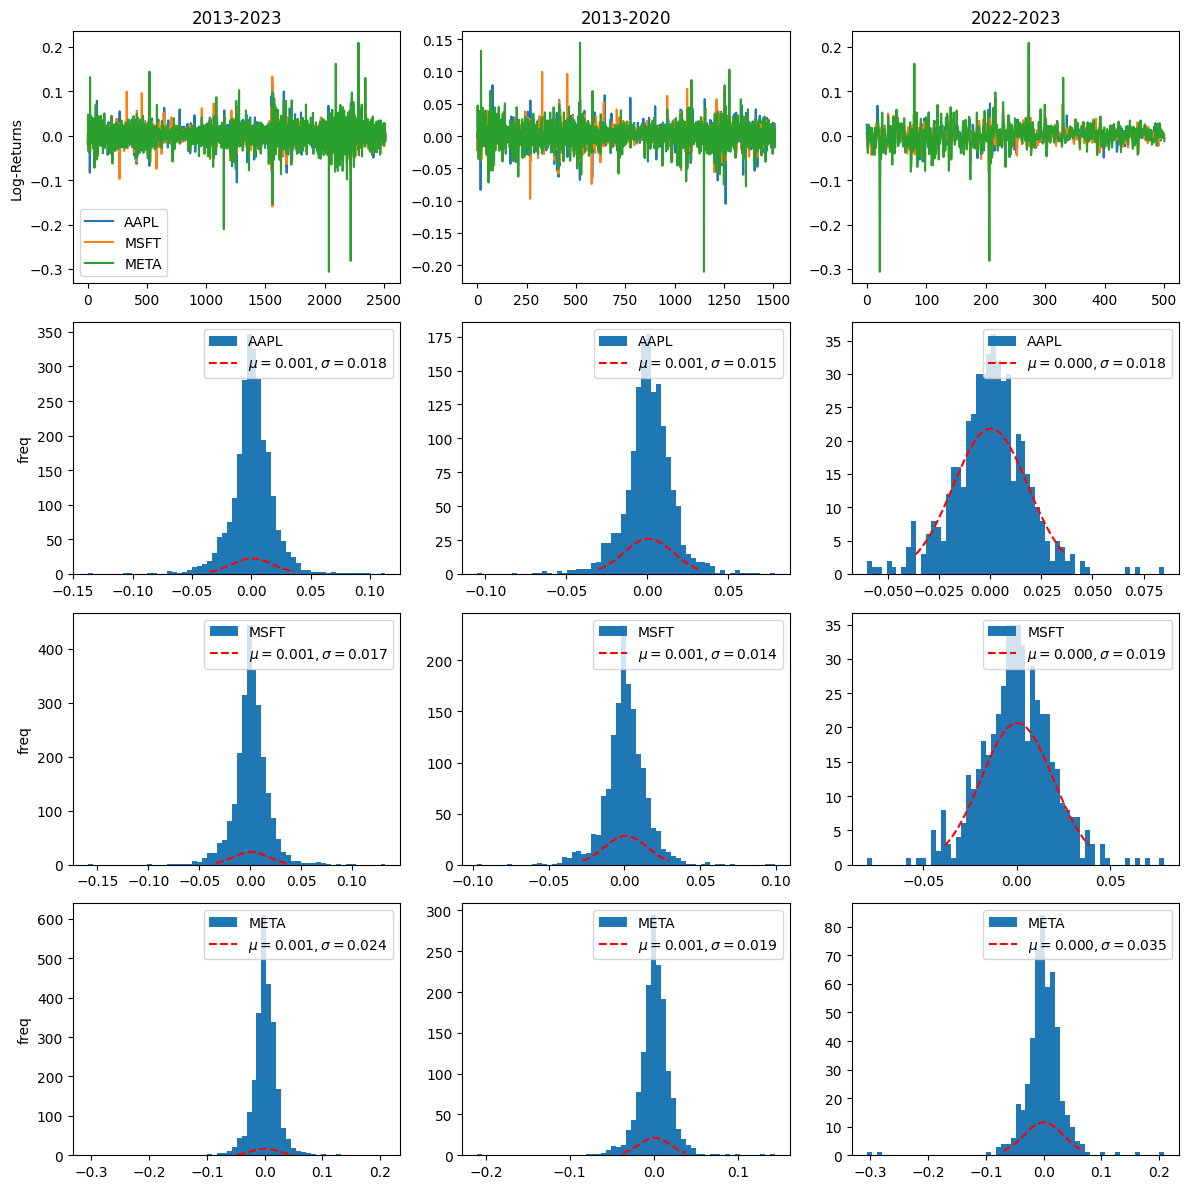

In [11]:
fig, ax = plt.subplots(4, 3, figsize=(12,12))

# plot log-returns for 3 time windows

ax[0,0].plot(np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values), label='AAPL')
ax[0,0].plot(np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values), label='MSFT')
ax[0,0].plot(np.log(META.Close[1:].values/META.Close[:-1].values), label='META')
ax[0,0].set_title('2013-2023')
ax[0,0].set_ylabel('Log-Returns')
ax[0,0].legend()

ax[0,1].plot(np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values), label='AAPL')
ax[0,1].plot(np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values), label='MSFT')
ax[0,1].plot(np.log(META1.Close[1:].values/META1.Close[:-1].values), label='META')
ax[0,1].set_title('2013-2020')

ax[0,2].plot(np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values), label='AAPL')
ax[0,2].plot(np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values), label='MSFT')
ax[0,2].plot(np.log(META2.Close[1:].values/META2.Close[:-1].values), label='META')
ax[0,2].set_title('2022-2023')

# plot log-returns distribution for AAPL for 3 time windows
bins = 60
ax[1,0].hist(np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values), label='AAPL', bins=bins)
ax[1,0].set_ylabel('freq')
mu, sigma = st.norm.fit(np.log(AAPL[1:].Close.values/AAPL[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[1,0].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[1,0].legend()

ax[1,1].hist(np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values), label='AAPL', bins=bins)
mu, sigma = st.norm.fit(np.log(AAPL1[1:].Close.values/AAPL1[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[1,1].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[1,1].legend()

ax[1,2].hist(np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values), label='AAPL', bins=bins)
mu, sigma = st.norm.fit(np.log(AAPL2[1:].Close.values/AAPL2[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[1,2].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[1,2].legend()

# plot log-returns distribution for MSFT for 3 time windows
ax[2,0].hist(np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values), label='MSFT', bins=bins)
mu, sigma = st.norm.fit(np.log(MSFT[1:].Close.values/MSFT[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[2,0].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[2,0].set_ylabel('freq')
ax[2,0].legend()

ax[2,1].hist(np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values), label='MSFT', bins=bins)
mu, sigma = st.norm.fit(np.log(MSFT1[1:].Close.values/MSFT1[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[2,1].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[2,1].legend()

ax[2,2].hist(np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values), label='MSFT', bins=bins)
mu, sigma = st.norm.fit(np.log(MSFT2[1:].Close.values/MSFT2[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[2,2].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[2,2].legend()

# plot log-returns distribution for META for 3 time windows
ax[3,0].hist(np.log(META.Close[1:].values/META.Close[:-1].values), label='META', bins=bins)
mu, sigma = st.norm.fit(np.log(META[1:].Close.values/META[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[3,0].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[3,0].set_ylabel('freq')
ax[3,0].legend()

ax[3,1].hist(np.log(META1.Close[1:].values/META1.Close[:-1].values), label='META', bins=bins)
mu, sigma = st.norm.fit(np.log(META1[1:].Close.values/META1[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[3,1].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[3,1].legend()

ax[3,2].hist(np.log(META2.Close[1:].values/META2.Close[:-1].values), label='META', bins=bins)
mu, sigma = st.norm.fit(np.log(META2[1:].Close.values/META2[:-1].Close.values))
xmin, xmax= mu-2*sigma, mu+2*sigma
x=np.linspace(xmin,xmax,100)
ax[3,2].plot(x,st.norm.pdf(x,mu,sigma),'r--', label=r'$\mu=%.3f,\sigma=%.3f$'%(mu, sigma))
ax[3,2].legend()

fig.tight_layout()


df = pd.DataFrame()
df['2013-2023'] = [np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).mean(), np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).std(), 
                   np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).mean(), np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).std(), 
                   np.log(META.Close[1:].values/META.Close[:-1].values).mean(), np.log(META.Close[1:].values/META.Close[:-1].values).std()]
df['2013-2020'] = [np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).mean(), np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).std(),
                   np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).mean(), np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).std(),
                   np.log(META1.Close[1:].values/META1.Close[:-1].values).mean(), np.log(META1.Close[1:].values/META1.Close[:-1].values).std()]
df['2022-2023'] = [np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).mean(), np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).std(),
                   np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).mean(), np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).std(),
                   np.log(META2.Close[1:].values/META2.Close[:-1].values).mean(), np.log(META2.Close[1:].values/META2.Close[:-1].values).std()]
df.index = pd.MultiIndex.from_tuples([('AAPL', 'mean'), ('AAPL','std'),
                                      ('MSFT', 'mean'), ('MSFT','std'),
                                      ('META', 'mean'), ('META','std')  ], 
                                        names=['Ticker', 'stats'])
df


Text(0.5, 1.0, 'std log-return')

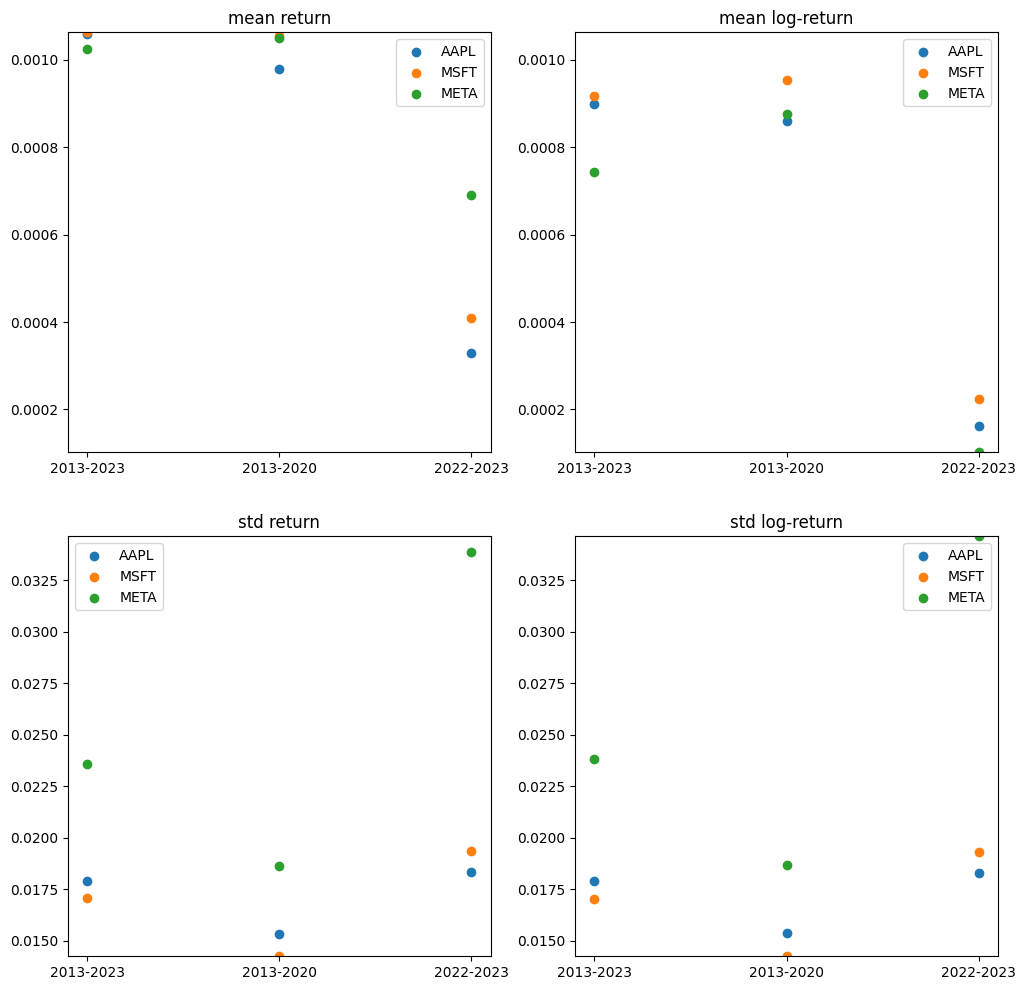

In [12]:
# SUMMARY of mean returns for different time periods

fig, ax = plt.subplots(2,2, figsize=(12,12))
x = ['2013-2023', '2013-2020', '2022-2023']
ax[0,0].scatter(x, [(AAPL.Close[1:].values/AAPL.Close[:-1].values-1).mean(),
                    (AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).mean(),
                    (AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).mean()], label='AAPL')

ax[0,0].scatter(x, [(MSFT.Close[1:].values/MSFT.Close[:-1].values-1).mean(),
                    (MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).mean(),
                    (MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).mean()], label='MSFT')

ax[0,0].scatter(x, [(META.Close[1:].values/META.Close[:-1].values-1).mean(),
                    (META1.Close[1:].values/META1.Close[:-1].values-1).mean(),
                    (META2.Close[1:].values/META2.Close[:-1].values-1).mean()], label='META')

ax[0,0].legend()
ax[0,0].set_title('mean return')
means = [(AAPL.Close[1:].values/AAPL.Close[:-1].values-1).mean(),
        (AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).mean(),
        (AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).mean(),
        (MSFT.Close[1:].values/MSFT.Close[:-1].values-1).mean(),
        (MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).mean(),
        (MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).mean(),
        (META.Close[1:].values/META.Close[:-1].values-1).mean(),
        (META1.Close[1:].values/META1.Close[:-1].values-1).mean(),
        (META2.Close[1:].values/META2.Close[:-1].values-1).mean()]

meansLog = [np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).mean(),
            np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).mean(),
            np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).mean(),
            np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).mean(),
            np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).mean(),
            np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).mean(),
            np.log(META.Close[1:].values/META.Close[:-1].values).mean(),
            np.log(META1.Close[1:].values/META1.Close[:-1].values).mean(),
            np.log(META2.Close[1:].values/META2.Close[:-1].values).mean()]

ax[0,0].set_ylim(min(means+meansLog), max(means+meansLog))

ax[0,1].scatter(x, [np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).mean(),
                    np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).mean(),
                    np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).mean()], label='AAPL')

ax[0,1].scatter(x, [np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).mean(),
                    np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).mean(),
                    np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).mean()], label='MSFT')

ax[0,1].scatter(x, [np.log(META.Close[1:].values/META.Close[:-1].values).mean(),
                    np.log(META1.Close[1:].values/META1.Close[:-1].values).mean(),
                    np.log(META2.Close[1:].values/META2.Close[:-1].values).mean()], label='META')

ax[0,1].legend()
ax[0,1].set_title('mean log-return')
ax[0,1].set_ylim(min(means+meansLog), max(means+meansLog))

ax[1,0].scatter(x, [(AAPL.Close[1:].values/AAPL.Close[:-1].values-1).std(),
                    (AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).std(),
                    (AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).std()], label='AAPL')

ax[1,0].scatter(x, [(MSFT.Close[1:].values/MSFT.Close[:-1].values-1).std(),
                    (MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).std(),
                    (MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).std()], label='MSFT')

ax[1,0].scatter(x, [(META.Close[1:].values/META.Close[:-1].values-1).std(),
                    (META1.Close[1:].values/META1.Close[:-1].values-1).std(),
                    (META2.Close[1:].values/META2.Close[:-1].values-1).std()], label='META')

ax[1,0].legend()
ax[1,0].set_title('std return')

stds = [(AAPL.Close[1:].values/AAPL.Close[:-1].values-1).std(),
        (AAPL1.Close[1:].values/AAPL1.Close[:-1].values-1).std(),
        (AAPL2.Close[1:].values/AAPL2.Close[:-1].values-1).std(),
        (MSFT.Close[1:].values/MSFT.Close[:-1].values-1).std(),
        (MSFT1.Close[1:].values/MSFT1.Close[:-1].values-1).std(),
        (MSFT2.Close[1:].values/MSFT2.Close[:-1].values-1).std(),
        (META.Close[1:].values/META.Close[:-1].values-1).std(),
        (META1.Close[1:].values/META1.Close[:-1].values-1).std(),
        (META2.Close[1:].values/META2.Close[:-1].values-1).std()]

stdsLog = [np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).std(),
            np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).std(),
            np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).std(),
            np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).std(),
            np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).std(),
            np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).std(),
            np.log(META.Close[1:].values/META.Close[:-1].values).std(),
            np.log(META1.Close[1:].values/META1.Close[:-1].values).std(),
            np.log(META2.Close[1:].values/META2.Close[:-1].values).std()]
ax[1,0].set_ylim(min(stds+stdsLog), max(stds+stdsLog))
ax[1,1].scatter(x, [np.log(AAPL.Close[1:].values/AAPL.Close[:-1].values).std(),
                    np.log(AAPL1.Close[1:].values/AAPL1.Close[:-1].values).std(),
                    np.log(AAPL2.Close[1:].values/AAPL2.Close[:-1].values).std()], label='AAPL')

ax[1,1].scatter(x, [np.log(MSFT.Close[1:].values/MSFT.Close[:-1].values).std(),
                    np.log(MSFT1.Close[1:].values/MSFT1.Close[:-1].values).std(),
                    np.log(MSFT2.Close[1:].values/MSFT2.Close[:-1].values).std()], label='MSFT')

ax[1,1].scatter(x, [np.log(META.Close[1:].values/META.Close[:-1].values).std(),
                    np.log(META1.Close[1:].values/META1.Close[:-1].values).std(),
                    np.log(META2.Close[1:].values/META2.Close[:-1].values).std()], label='META')

ax[1,1].legend()
ax[1,1].set_ylim(min(stds+stdsLog), max(stds+stdsLog))
ax[1,1].set_title('std log-return')

### Conclusion

There is not much difference between using returns or log-returns. Regarding the time period, the last one (2022-2023) seems to be the more convenint given that

- it's the one that has the returns closer to a normal distribution
- it's convenient over the second one (before COVID) given that it is closer to the period of interest (1/24 to 2/24)
- it's convenient over the first one (2013-2023) given that it avoid COVID crisis and the large market movements involved in that period

It could be argued that the first one is the more convenient one given that

- it has more data

If there is enough time, we will compare the results obtaining with these 2 periods. However, given the large market movements involved in the first period, and that the returns are considerable further away to a normal distribution, the simulations of these returns could be more challenging that simulating nearly-normally distributed returns.